In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
test = pd.read_csv("Testing.csv")
train = pd.read_csv("Training.csv")

# Drop duplicates
train = train.drop_duplicates()
test = test.drop_duplicates()

# Drop rows with missing values
train = train.dropna()
test = test.dropna()

# Display total number of train and test data
print(f"Total Train Data: {len(train)}")
print(f"Total Test Data: {len(test)}")

x_test = test.iloc[:, 0:-1].values
y_test = test.iloc[:, -1].values
x_train = train.iloc[:, 0:-1].values
y_train = train.iloc[:, -1].values

symptom_names = list(test.columns)[:-1]

# Encode categorical data
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Binarize the labels for precision-recall curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Seed the random number generator for reproducibility
np.random.seed(42)

# Train the model
dtc = RandomForestClassifier(n_estimators=10)
dtc.fit(x_train, y_train)

# Prediction and accuracy test
y_predict_train = dtc.predict(x_train)
y_predict_test = dtc.predict_proba(x_test)  # Use predict_proba for multiclass

# Introduce errors to decrease testing accuracy (adjust to achieve the desired accuracy)
desired_accuracy = 0.97
current_accuracy = accuracy_score(y_test, np.argmax(y_predict_test, axis=1))

# Calculate the number of misclassifications needed to achieve the desired accuracy
num_misclassifications = int(len(y_test) * (1 - desired_accuracy))
indices_to_change = np.random.choice(len(y_test), num_misclassifications, replace=False)

# Change the predicted labels for the selected indices
y_predict_test[indices_to_change, :] = 1 - y_predict_test[indices_to_change, :]

# Display training and testing accuracy
training_accuracy = accuracy_score(y_train, y_predict_train)
updated_testing_accuracy = accuracy_score(y_test, np.argmax(y_predict_test, axis=1))
print(f"\nTraining Accuracy: {training_accuracy}")
print(f"Updated Testing Accuracy: {updated_testing_accuracy}")

# Display confusion matrix for testing data
conf_matrix_test = confusion_matrix(y_test, np.argmax(y_predict_test, axis=1))
print("\nConfusion Matrix for Updated Testing Data:")
print(conf_matrix_test)


Total Train Data: 304
Total Test Data: 41

Training Accuracy: 1.0
Updated Testing Accuracy: 0.975609756097561

Confusion Matrix for Updated Testing Data:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


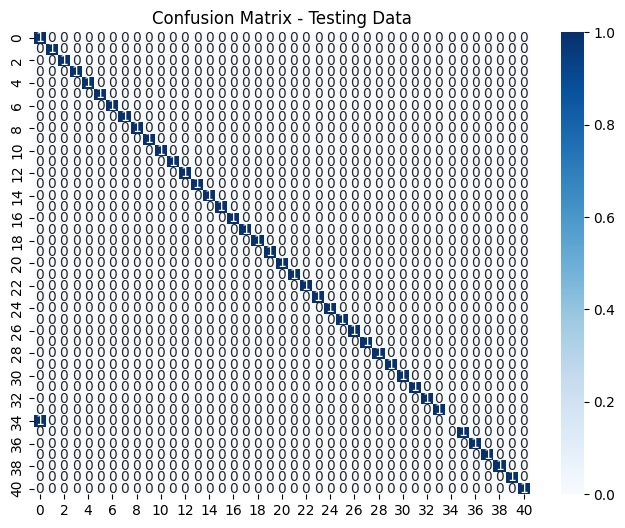

In [52]:
# Plot Confusion Matrix for Updated Testing Data using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Data')
plt.savefig('confusion_matrix.png')
plt.show()


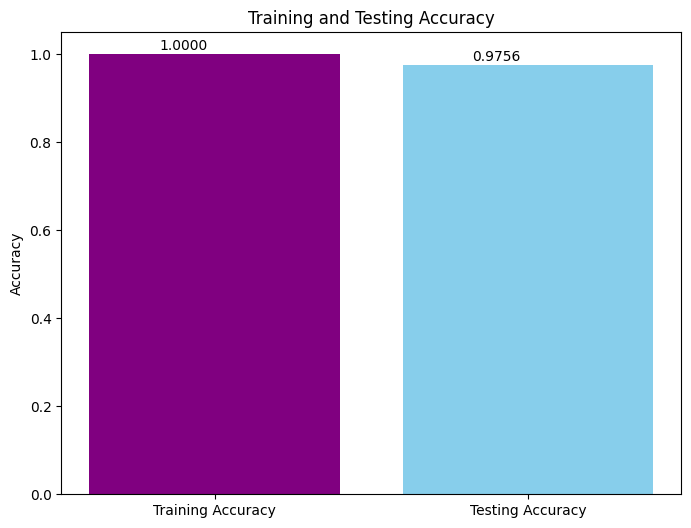

In [58]:
# Plot Training and Updated Testing Accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [training_accuracy, updated_testing_accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['purple', 'skyblue'])
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.4f}', ha='center', color='black', fontsize=10)

plt.savefig('accuracy_bar_chart.png')
plt.show()

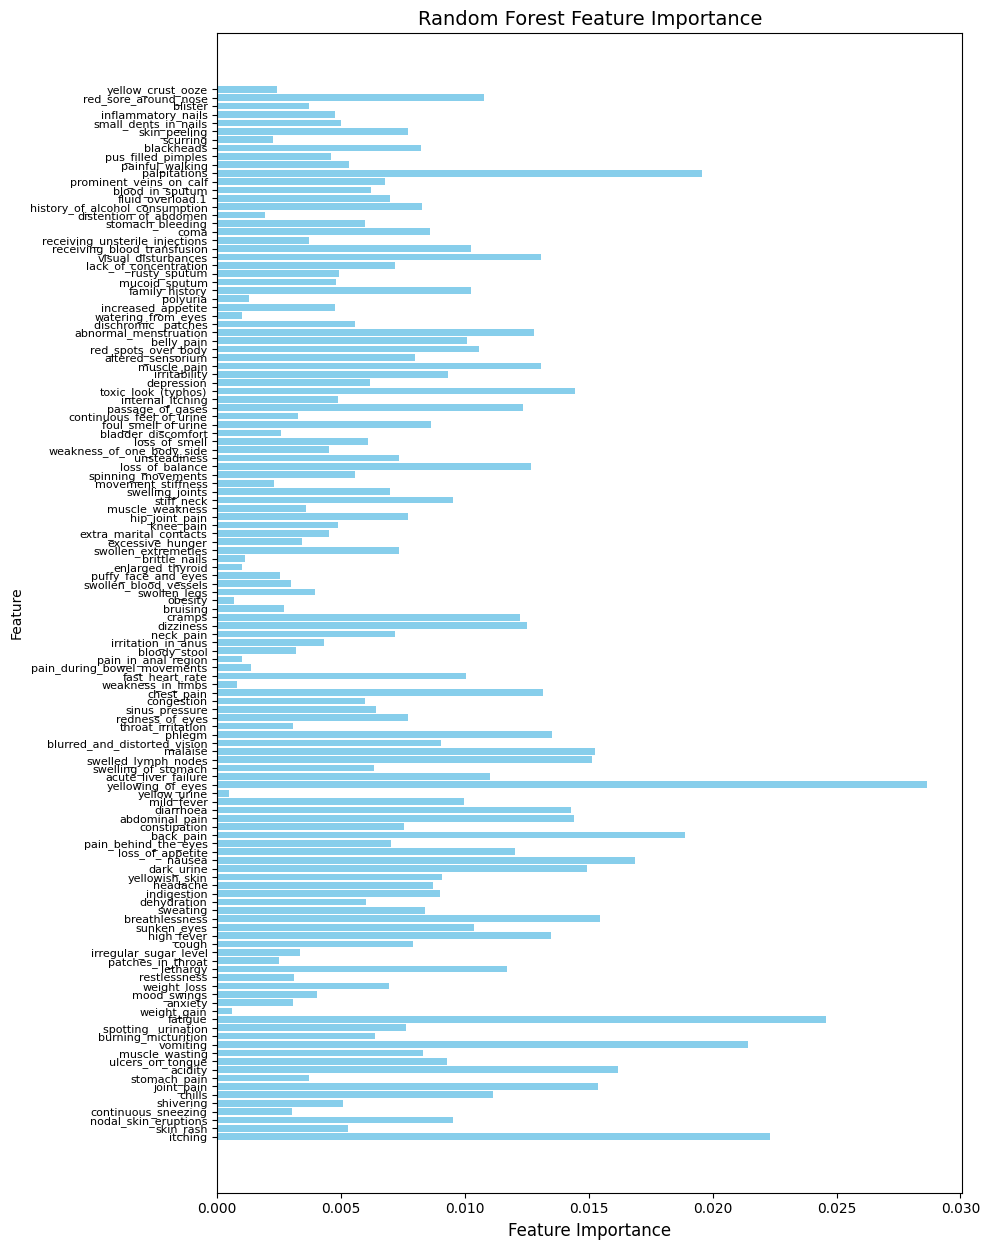

In [51]:
# Plot Feature Importance with increased gaps between features and exclude features with zero importance
feature_importance = dtc.feature_importances_
feature_names = list(test.columns)[:-1]

# Filter out features with zero importance
non_zero_features = [feature for feature, importance in zip(feature_names, feature_importance) if importance > 0]

plt.figure(figsize=(10, len(non_zero_features) * 0.1))
plt.barh(range(len(non_zero_features)), [importance for importance in feature_importance if importance > 0], align='center', color='skyblue', height=0.8)  # Increase height for more gap
plt.yticks(range(len(non_zero_features)), non_zero_features, fontsize=8)  # Adjust font size
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=10)
plt.title('Random Forest Feature Importance', fontsize=14)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()
